LOAD MODEL

In [22]:
import numpy as np 
import pandas as pd 
import torch
from tqdm import tqdm
import sys

import warnings
warnings.filterwarnings("ignore")
from tqdm.notebook import tqdm
tqdm.pandas()
import os
import cv2
import matplotlib.pyplot as plt
import glob
import shutil
from PIL import Image
import ast
import random

In [23]:
import torch
model = torch.hub.load('yolov5-lib-ds', 
                       'custom', 
                       path='models/best.pt',
                       source='local',
                       force_reload=True)  # local repo
model.conf = 0.25
model.iou  = 0.50  # NMS IoU threshold
model.classes = None   # (optional list) filter by class, i.e. = [0, 15, 16] for persons, cats and dogs
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

YOLOv5 🚀 fea5443 torch 1.10.0 CPU

Fusing layers... 
Model Summary: 280 layers, 12308200 parameters, 0 gradients, 16.2 GFLOPs
Adding AutoShape... 


In [24]:
def plot_one_box(x, img, color=None, label=None, line_thickness=None):
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

def draw_bboxes(img, bboxes, classes, class_ids, colors = None, show_classes = None, bbox_format = 'yolo', class_name = False, line_thickness = 2):  
     
    image = img.copy()
    show_classes = classes if show_classes is None else show_classes
    colors = (0, 255 ,0) if colors is None else colors
    
    if bbox_format == 'yolo':
        
        for idx in range(len(bboxes)):  
            
            bbox  = bboxes[idx]
            cls   = classes[idx]
            cls_id = class_ids[idx]
            color = colors[cls_id] if type(colors) is list else colors
            
            if cls in show_classes:
            
                x1 = round(float(bbox[0])*image.shape[1])
                y1 = round(float(bbox[1])*image.shape[0])
                w  = round(float(bbox[2])*image.shape[1]/2) #w/2 
                h  = round(float(bbox[3])*image.shape[0]/2)

                voc_bbox = (x1-w, y1-h, x1+w, y1+h)
                plot_one_box(voc_bbox, 
                             image,
                             color = color,
                             label = cls if class_name else str(get_label(cls)),
                             line_thickness = line_thickness)
            
    elif bbox_format == 'coco':
        
        for idx in range(len(bboxes)):  
            
            bbox  = bboxes[idx]
            cls   = classes[idx]
            cls_id = class_ids[idx]
            color = colors[cls_id] if type(colors) is list else colors
            
            if cls in show_classes:            
                x1 = int(round(bbox[0]))
                y1 = int(round(bbox[1]))
                w  = int(round(bbox[2]))
                h  = int(round(bbox[3]))

                voc_bbox = (x1, y1, w, h)
                plot_one_box(voc_bbox, 
                             image,
                             color = color,
                             label = cls if class_name else str(cls_id),
                             line_thickness = line_thickness)

    elif bbox_format == 'voc_pascal':
        
        for idx in range(len(bboxes)):  
            
            bbox  = bboxes[idx]
            cls   = classes[idx]
            cls_id = class_ids[idx]
            color = colors[cls_id] if type(colors) is list else colors
            
            if cls in show_classes: 
                x1 = int(round(bbox[0]))
                y1 = int(round(bbox[1]))
                x2 = int(round(bbox[2]))
                y2 = int(round(bbox[3]))
                voc_bbox = (x1, y1, x2, y2)
                plot_one_box(voc_bbox, 
                             image,
                             color = color,
                             label = cls if class_name else str(cls_id),
                             line_thickness = line_thickness)
    else:
        raise ValueError('wrong bbox format')

    return image

np.random.seed(32)
colors = [(np.random.randint(255), np.random.randint(255), np.random.randint(255))\
          for idx in range(1)]



MAKE PREDICTION

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model = model.to(device)


cpu


In [26]:
def show_img(img, bboxes, bbox_format='coco'):
    names  = ['starfish']*len(bboxes)
    labels = [0]*len(bboxes)
    img    = draw_bboxes(img = img,
                           bboxes = bboxes, 
                           classes = names,
                           class_ids = labels,
                           class_name = True, 
                           colors = colors, 
                           bbox_format = bbox_format,
                           line_thickness = 2)
    return Image.fromarray(img).resize((800, 400))

746 664 809 718 confidence:  0.8590381145477295
630 323 676 364 confidence:  0.8579691052436829
626 672 679 717 confidence:  0.8563785552978516
892 496 960 557 confidence:  0.8362622857093811
830 150 891 205 confidence:  0.8207145929336548
684 151 727 199 confidence:  0.8058204054832458
535 674 572 716 confidence:  0.79747074842453
398 158 446 197 confidence:  0.7923467755317688
404 322 438 355 confidence:  0.7856568098068237
852 418 903 461 confidence:  0.78239506483078
1151 670 1214 717 confidence:  0.7387577891349792
648 355 675 398 confidence:  0.7370947599411011
356 85 393 111 confidence:  0.7253564596176147
638 56 683 94 confidence:  0.7194902300834656
310 105 337 128 confidence:  0.6596472263336182
538 149 564 179 confidence:  0.6330229640007019


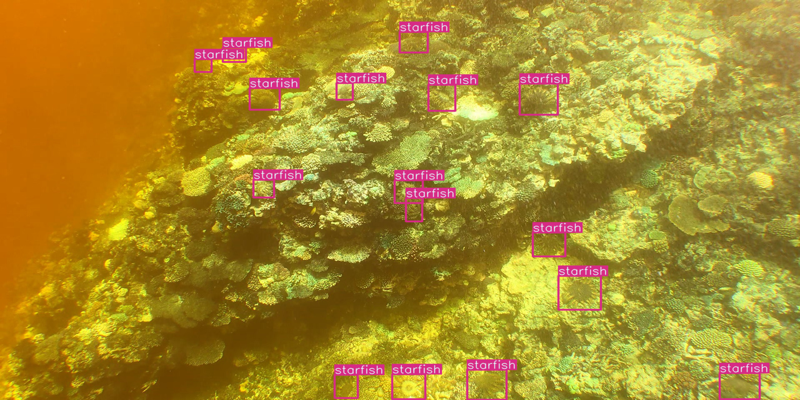

In [36]:
import cv2
img_id_original = '1-9114'
img= './test_images/'+img_id_original+'.jpg'
path=img
r = model(img, size=3600, augment=True)
preds   = r.pandas().xyxy[0]
bboxes  = preds[['xmin','ymin','xmax','ymax']].values
confs   = preds.confidence.values
bbclasses = preds['class'].values

bboxes_thr = []
for i in range(len(bboxes)):
    box = bboxes[i]
    cls_id = int(bbclasses[i])
    conf_single = confs[i]
    if conf_single < 0.51:
        continue
    bboxes_thr.append(box)
    x_min = int(box[0])
    y_min = int(box[1])
    x_max = int(box[2])
    y_max = int(box[3])
    print(x_min, y_min, x_max, y_max, "confidence: ",conf_single)
img=cv2.imread(img)
display(show_img(img, bboxes_thr, bbox_format='coco'))

CHECK IT WITH ORIGINAL IMAGE

In [76]:
%matplotlib inline
import matplotlib.patches as patches
import matplotlib.pyplot as plt

def show_image_original(path, annot,bboxes, axs=None):
    if axs==None:
        fig, axs = plt.subplots(figsize=(23, 8))
    
    img = plt.imread(path)
    axs.imshow(img)

    if annot:
        for a in eval(annot):
            #print(a)
            rect = patches.Rectangle((a["x"], a["y"]), a["width"], a["height"], 
                                     linewidth=2, edgecolor="#FF6103", facecolor='none')
            axs.add_patch(rect)
            axs.annotate("", (a["x"], a["y"]), color='w', weight='bold', 
                fontsize=10, va='top')
    
    if len(bboxes)>0:
        for a in bboxes:
            #print(a)
            rect = patches.Rectangle((a[0], a[1]), a[2]-a[0], a[3]-a[1], 
                                     linewidth=2, edgecolor="#00c923", facecolor='none')
            axs.add_patch(rect)
            axs.annotate("", (a[2], a[1]), color='w', weight='bold', 
                fontsize=10, va='top')

    axs.axis("off")

Check IoU (Intersection over Union), thus compare the intersection of original andp predicted Bounding-box.

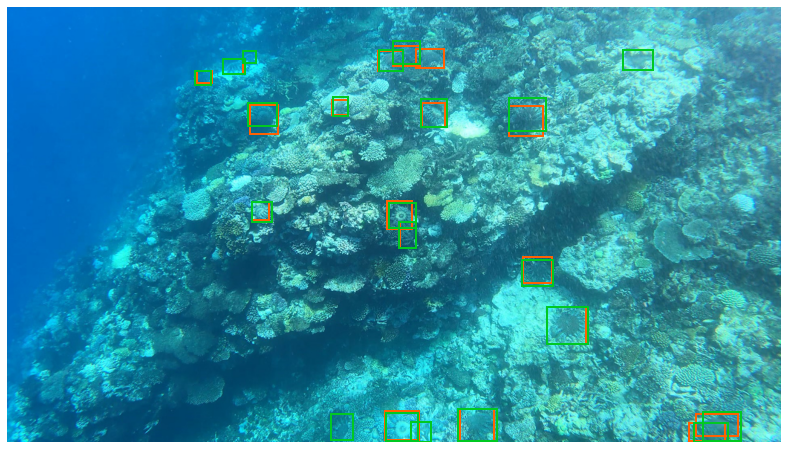

In [77]:
import pandas as pd

train_df = pd.read_csv("./train.csv")
#manually
x=train_df.loc[train_df['image_id'] == img_id_original]
annot = list(x['annotations'])[0]
show_image_original(path, annot,bboxes, axs=None)